In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [12]:
dataset = pd.read_csv('forestfires.csv')
X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, 12].values
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [13]:
print(dataset.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [14]:
dataset.shape

(517, 13)

In [15]:
print(list(dataset.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False]


In [16]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [17]:
dataset.rain.value_counts()

0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: rain, dtype: int64

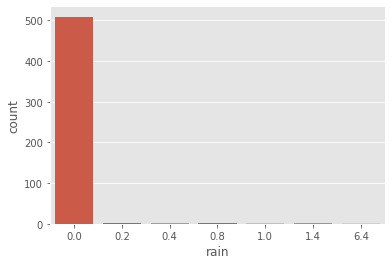

In [18]:
sb.countplot(x='rain', data=dataset)
plt.show()

In [19]:
col= ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']

In [21]:
train = dataset[col]

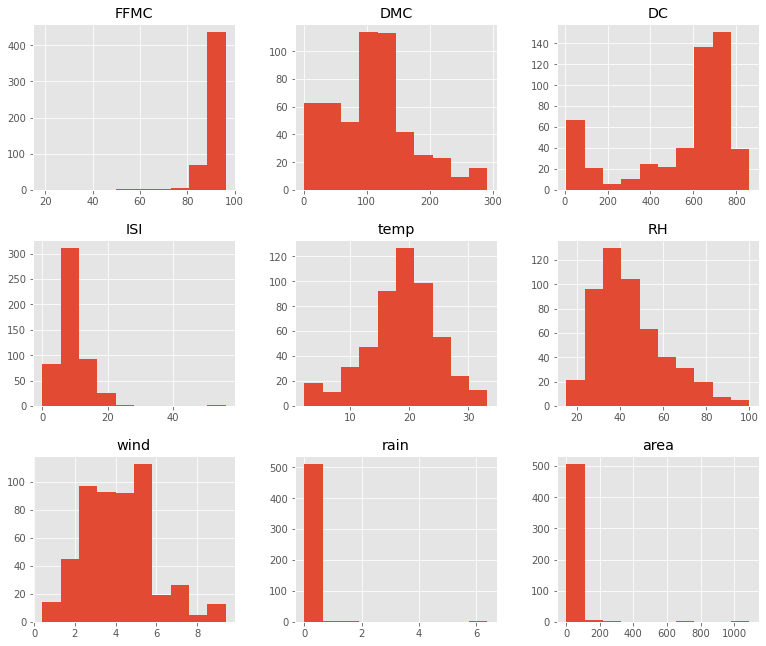

In [22]:
train.hist(figsize=(13, 11))
plt.show()

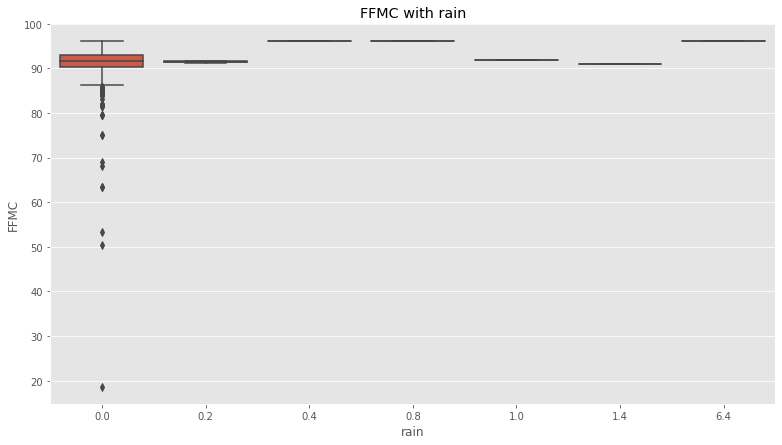

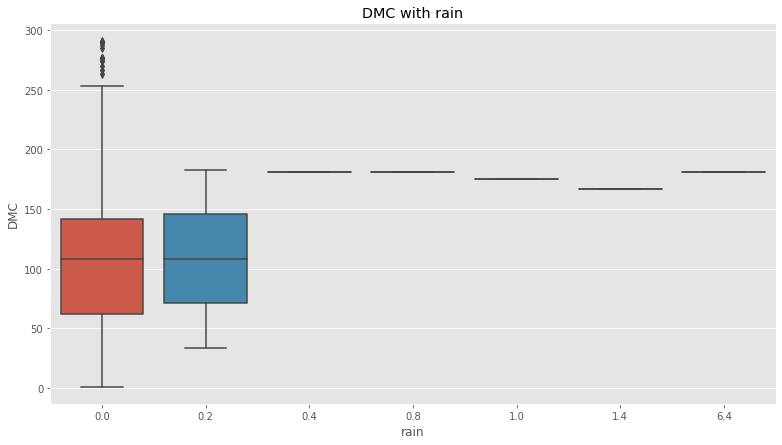

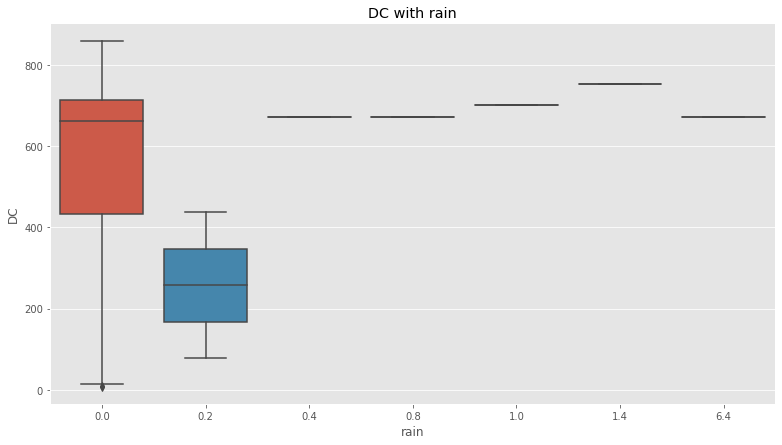

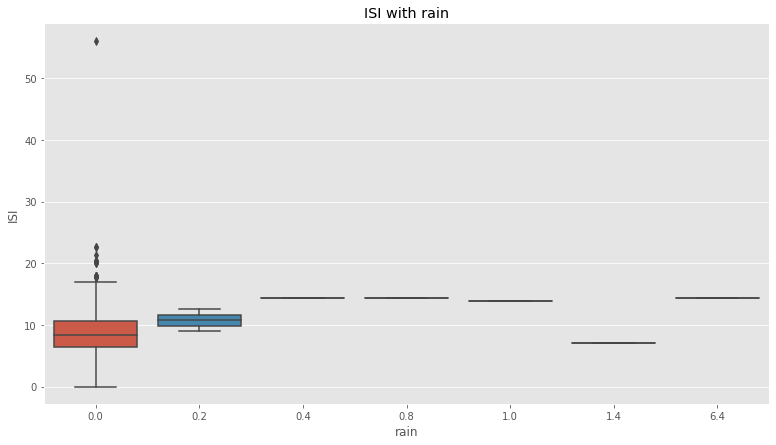

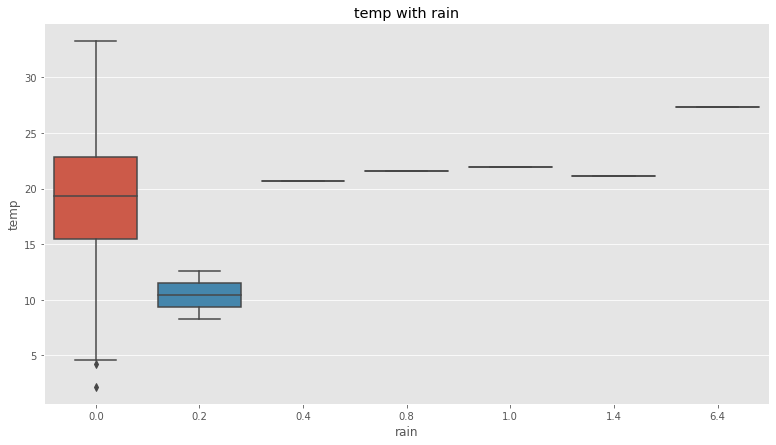

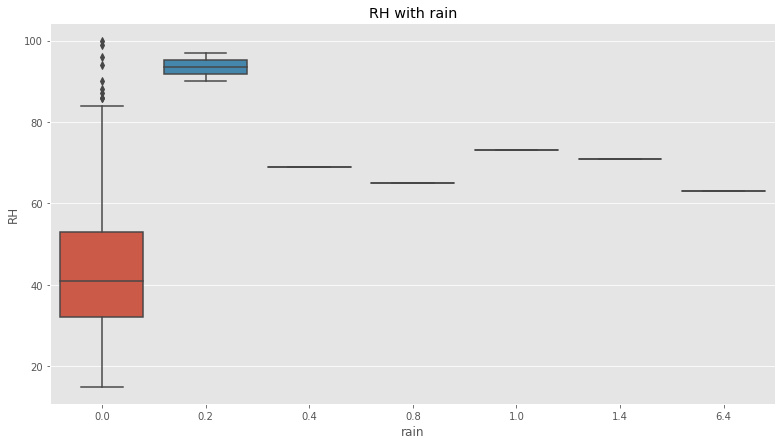

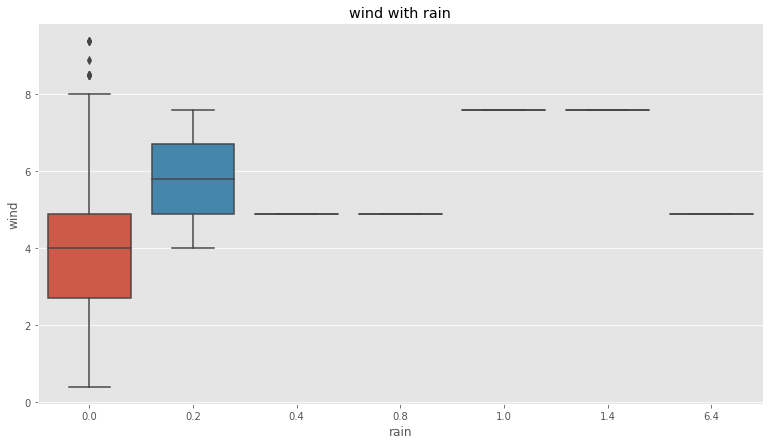

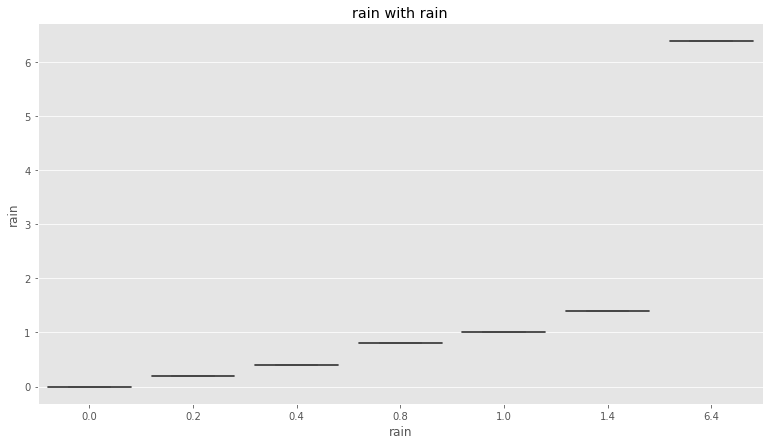

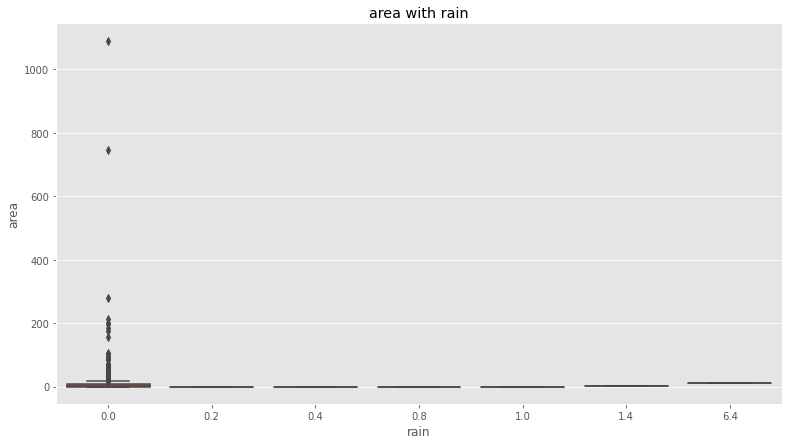

In [23]:
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('rain'))
    sb.boxplot(x=dataset.rain, y=train[i])
    plt.show()

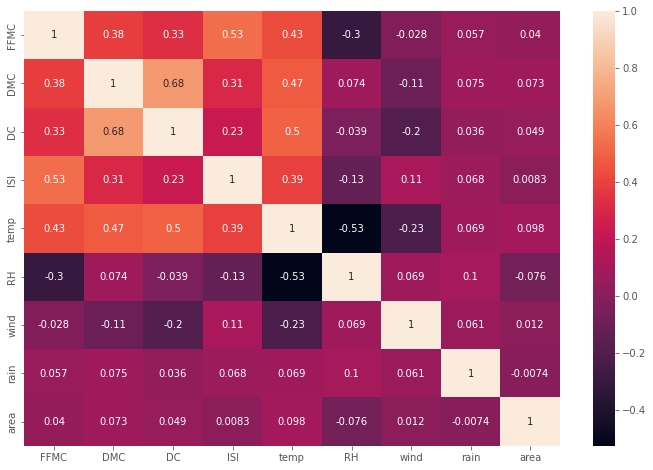

In [24]:
plt.figure(figsize=(12, 8))
corr = train.corr()
sb.heatmap(corr, annot=True)
plt.show()

In [25]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday


In [26]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor as dtr
reg = dtr(random_state = 42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))

MSE = 17779.252507692305
MAE = 33.486346153846156
R2 Score = -2.036589077200613


# Random forest

Random forest is a Supervised Learning algorithm that uses ensemble learning methods for regression.

In [31]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))

MSE = 12140.978743487098
MAE = 25.197784697100136
R2 Score = -20.380158734367964


From the above testing, we can see that the Decision Tree regression model the best model as it has the maximum R2 score in negative so we can use decision tree method to predict